# NASA Breath Diagnostics Challenge

## Exploratory Data Analysis

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
STAGING_DATA_FOLDER = "staging_data"
FIGURES_FOLDER = "figures"

In [3]:
train_readings_df = pd.read_csv(os.path.join(STAGING_DATA_FOLDER, "train_readings.csv"))
train_patients_df = pd.read_csv(os.path.join(STAGING_DATA_FOLDER, "train_patients.csv"))

In [4]:
train_readings_df.describe()

Time            D1            D2            D3            D4  \
count  17011.000000  17011.000000  17011.000000  17011.000000  17011.000000   
mean     427.304709     82.790582     13.124385     57.181407     35.299644   
std      248.206886     77.235479     15.444895     71.305168     32.477778   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      212.769000     27.189450      2.541590      5.319580     11.227497   
50%      427.700000     57.661600      6.195900     35.108214     23.624939   
75%      640.527000    116.556596     18.535653     86.895856     49.747858   
max     1023.005000    526.115979     85.543796    570.216641    164.560731   

                 D5            D6            D7             D8            D9  \
count  17011.000000  17011.000000  17011.000000   17011.000000  17011.000000   
mean     802.625789    195.202339    909.319536  106580.189778   1231.704583   
std     1141.516795    329.476614   1200.539756  135908.980557   2892.254308   
min        0.000000      0.000000      0.000000       0.000000      0.000000   
25%      174.612450     16.042655     82.456140   12581.730891     44.008233   
50%      404.241220     68.977056    282.456140   39218.589083    274.314020   
75%      918.038115    156.529194   1403.508772  169065.441296   1550.083789   
max    12619.734520   1881.399120   6577.192980  703844.107475  29715.009500   

       ...           D56           D57           D58           D59  \
count  ...  1.701100e+04  17011.000000  17011.000000  17011.000000   
mean   ...  9.222690e+06     13.302048     47.422683   9236.279933   
std    ...  5.261053e+06     10.515801     23.220846   7204.872971   
min    ...  0.000000e+00      0.000000      0.000000      0.000000   
25%    ...  5.167139e+06      6.065380     31.669430   4060.494500   
50%    ...  8.222922e+06     10.537928     44.247790   7612.880644   
75%    ...  1.297690e+07     17.078090     59.004910  12323.462647   
max    ...  2.715138e+07     68.051648    158.117577  41594.890158   

                D60           D61           D62           D63           D64  \
count  17011.000000  17011.000000  17011.000000  17011.000000  17011.000000   
mean     542.823495    388.535925    103.033607    798.463564   5166.451811   
std      447.665081    359.089099     76.080721    562.985053   3969.979817   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      193.995779    182.323405     51.498560    386.142708   2187.000263   
50%      446.789400    282.833940     83.820562    692.618483   4290.517600   
75%      750.488450    471.592730    129.935940   1076.689984   7015.815920   
max     2804.609520   3124.089720    562.363240   4316.679800  29731.386000   

         Patient ID  
count  17011.000000  
mean      32.127153  
std       18.371027  
min        1.000000  
25%       17.000000  
50%       31.000000  
75%       46.000000  
max       63.000000  

[8 rows x 66 columns]

In [5]:
train_patients_df.describe()

Patient ID     Result
count   45.000000  45.000000
mean    32.088889   0.422222
std     18.584967   0.499495
min      1.000000   0.000000
25%     17.000000   0.000000
50%     31.000000   0.000000
75%     46.000000   1.000000
max     63.000000   1.000000

In [6]:
PATIENT_IDS = [1, 4, 10, 12]
# 1 and 12 have COVID, 4 and 10 don't have COVID

In [7]:
sample_df = train_readings_df[train_readings_df["Patient ID"].isin(PATIENT_IDS)]
# sample_df = sample_df.drop(columns=[x for x in sample_df.columns if x == "Patient ID"])
sample_df

Time         D1        D2        D3         D4           D5  \
812     0.000  44.953990  6.016480  4.424111  16.668637   886.555847   
813     2.282  47.669332  6.670445  4.457627  17.811404   869.058034   
814     4.532  49.479560  6.496054  4.507901  18.599519  1093.613298   
815     6.815  46.764218  4.621354  4.189499  12.334003   971.128609   
816     9.067  45.859104  4.316170  4.055435  10.757773   487.022456   
...       ...        ...       ...       ...        ...          ...   
6893  839.700   2.220953  0.000000  0.071487   1.590949    32.301660   
6894  842.000   2.855511  0.318907  0.071487   2.960933    24.391050   
6895  844.300   0.000000  0.410023  0.053616   2.739968    30.653610   
6896  846.500   1.586395  0.683371  0.035744   2.695775    74.161970   
6897  848.800   0.317279  0.683371  0.000000   3.049319    25.050260   

             D6          D7           D8         D9  ...           D56  \
812   11.909577  428.070175  2905.811623  15.571704  ...  3.994169e+06   
813   12.358995  487.719298  3295.479849  16.758120  ...  8.543732e+06   
814   12.628646  564.912281  3579.380984  20.296180  ...  6.497085e+06   
815   10.651207  417.543860  2655.310621  16.991165  ...  3.543732e+06   
816    9.932138  380.701754  2321.309285  15.592890  ...  7.842566e+06   
...         ...         ...          ...        ...  ...           ...   
6893   3.782510    1.082583     0.000000   0.000000  ...  3.220670e+06   
6894   0.472810    0.360861   188.006000   0.315524  ...  6.125698e+06   
6895   0.945630    0.000000   250.674000   0.315524  ...  3.733240e+06   
6896   0.945630    0.541291   376.011000   0.446992  ...  1.224860e+06   
6897   0.000000    0.000000   626.684000   0.289230  ...  5.444134e+06   

            D57        D58          D59         D60         D61         D62  \
812   14.526012  52.000578  6176.841347  271.422809  427.191487  166.420295   
813   15.495990  57.417305  6356.924185  271.422809  401.363707  175.003576   
814   14.336748  42.611585  6221.862057  267.388924  480.396715  172.619331   
815   14.100168  41.889354  6212.857915  269.694001  462.317268  161.651805   
816   13.910904  53.083923  6221.862057  266.812655  404.463040  165.943446   
...         ...        ...          ...         ...         ...         ...   
6893   0.431930  19.389060   309.333400    8.628120   14.371950   38.469330   
6894   0.566909  26.339860   202.666700    5.973320    5.748780   43.531080   
6895   0.647896  28.900680    53.333400    6.637020   95.429720    0.000000   
6896   0.000000  29.998170     0.000000    1.327400   85.081920   35.432280   
6897   0.134978  28.900680   149.333400    0.000000    0.000000   42.518730   

              D63          D64  Patient ID  
812   1016.607644  8176.257646          10  
813   1068.506533  8904.423085          10  
814   1041.030651  8342.695460          10  
815    976.920259  8176.257646          10  
816    967.761631  8113.843465          10  
...           ...          ...         ...  
6893   109.155900   542.197100           1  
6894    86.001600   542.197100           1  
6895   122.386900   424.328200           1  
6896    62.847300   165.016500           1  
6897     0.000000     0.000000           1  

[1504 rows x 66 columns]

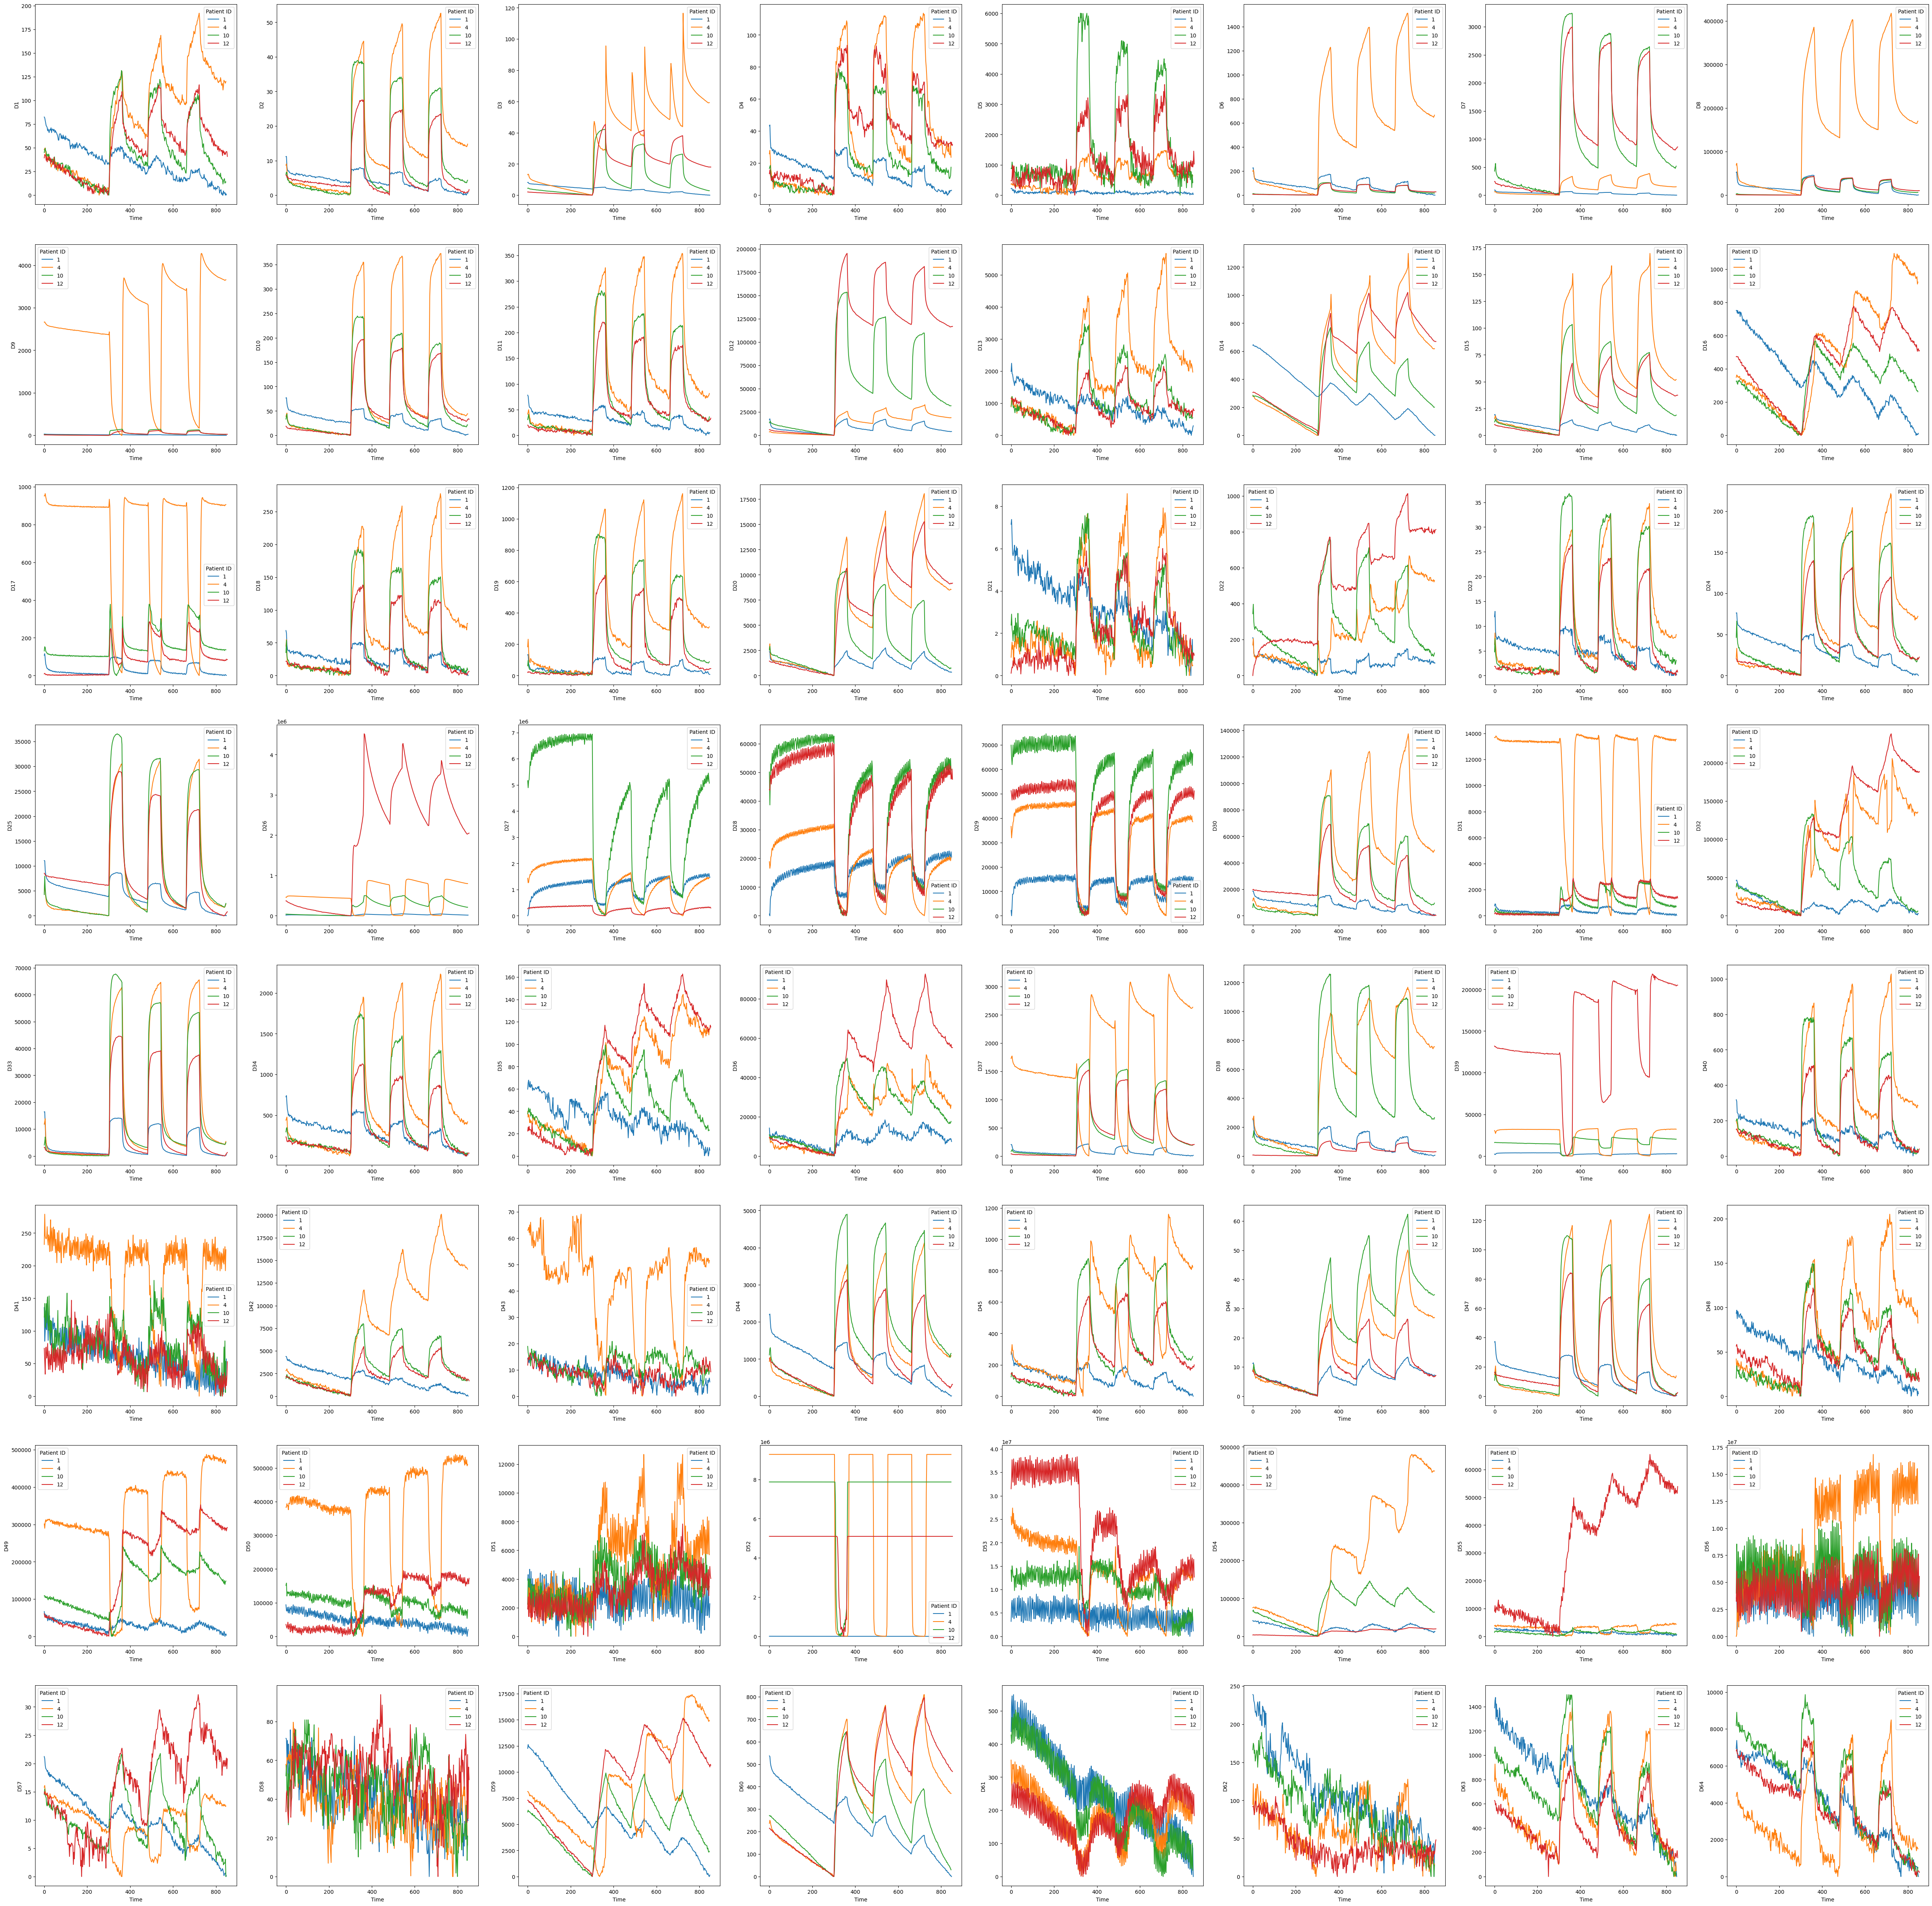

In [8]:
fig, ax = plt.subplots(8, 8, figsize=(64, 64))
for i in range(64):
    _ = sns.lineplot(sample_df, x="Time", y=f"D{i+1}", hue="Patient ID", palette="tab10", ax=ax[i // 8][i % 8])
fig.savefig(os.path.join(FIGURES_FOLDER, "raw_samples_timeline.png"), bbox_inches="tight")